## Multiple Linear Regression

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [5]:
cars=pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


#### Description of columns
- hp = horse power=x1
- mpg = milege (miles per gallon)=y
- vol= volume (size)=x2
- wt = weight of the car(pounds)=x4
- sp = speed(miles per hour) =x3
- y=f(x1,x2,x3,x4)
- x's are independent
- y is dependent

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [8]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [10]:
#check for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

#### observations about info and missing values

- There are no missing values
- There aare 81 observations (81 different ccars data)
- The data types of the ccols are also relevant and valid

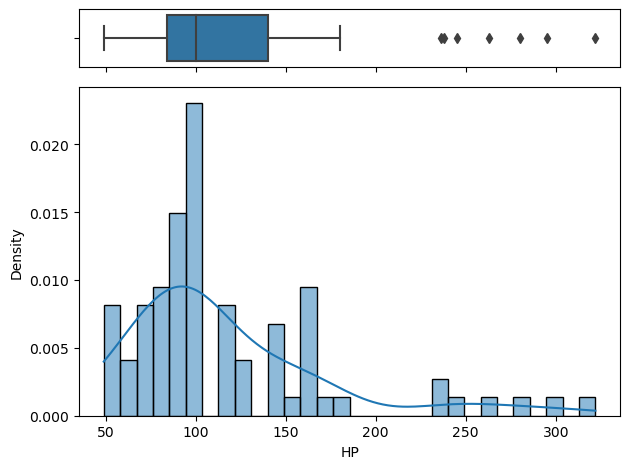

In [15]:
#Create a figure with two subplots9one above the other)
fig, (ax_box, ax_hist) =  plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})

#creating a boxplot
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='') #remove x label for the boxplot

#creating a histogram in the same x - axizs
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat='density')
ax_hist.set(ylabel='Density')

#adjust layout
plt.tight_layout()
plt.show()

#### Observations
There are 7 data points and right skewed

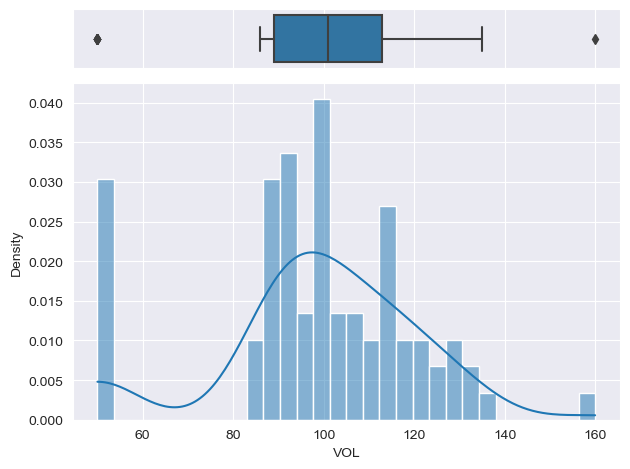

In [37]:
#Create a figure with two subplots9one above the other)
fig, (ax_box, ax_hist) =  plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})

#creating a boxplot
sns.boxplot(data=cars, x='VOL', ax=ax_box, orient='h')
ax_box.set(xlabel='') #remove x label for the boxplot

#creating a histogram in the same x - axizs
sns.histplot(data=cars, x='VOL', ax=ax_hist, bins=30, kde=True, stat='density')
ax_hist.set(ylabel='Density')

#adjust layout
plt.tight_layout()
plt.show()

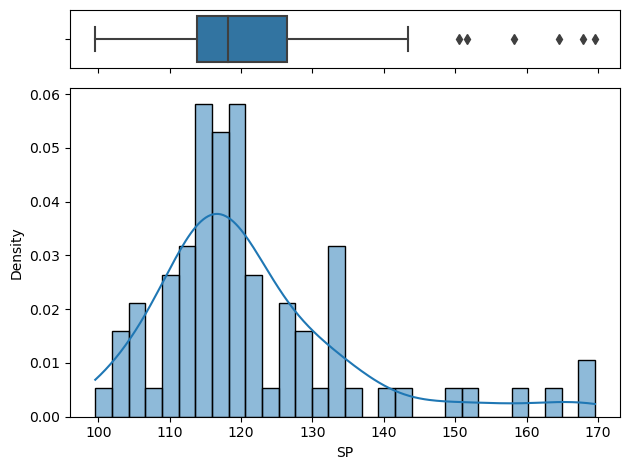

In [22]:
#Create a figure with two subplots9one above the other)
fig, (ax_box, ax_hist) =  plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})

#creating a boxplot
sns.boxplot(data=cars, x='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='') #remove x label for the boxplot

#creating a histogram in the same x - axizs
sns.histplot(data=cars, x='SP', ax=ax_hist, bins=30, kde=True, stat='density')
ax_hist.set(ylabel='Density')

#adjust layout
plt.tight_layout()
plt.show()

#### Observations
- In above graph six outliers are present and it is right skewed

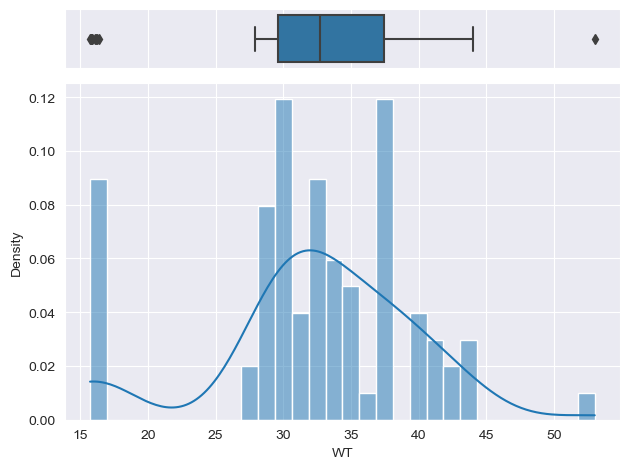

In [38]:
#Create a figure with two subplots9one above the other)
fig, (ax_box, ax_hist) =  plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})

#creating a boxplot
sns.boxplot(data=cars, x='WT', ax=ax_box, orient='h')
ax_box.set(xlabel='') #remove x label for the boxplot

#creating a histogram in the same x - axizs
sns.histplot(data=cars, x='WT', ax=ax_hist, bins=30, kde=True, stat='density')
ax_hist.set(ylabel='Density')

#adjust layout
plt.tight_layout()
plt.show()

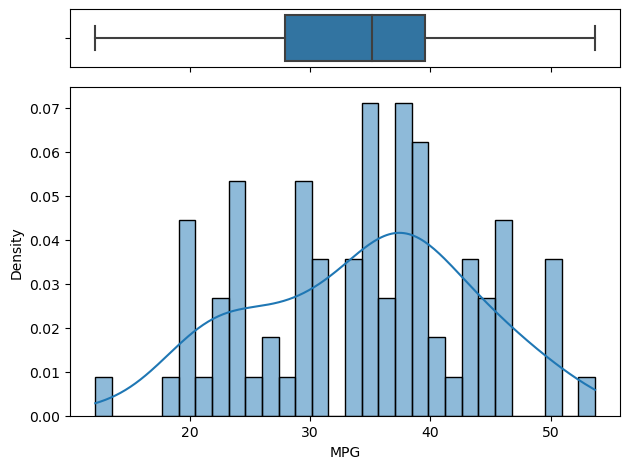

In [25]:
#Create a figure with two subplots9one above the other)
fig, (ax_box, ax_hist) =  plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})

#creating a boxplot
sns.boxplot(data=cars, x='MPG', ax=ax_box, orient='h')
ax_box.set(xlabel='') #remove x label for the boxplot

#creating a histogram in the same x - axizs
sns.histplot(data=cars, x='MPG', ax=ax_hist, bins=30, kde=True, stat='density')
ax_hist.set(ylabel='Density')

#adjust layout
plt.tight_layout()
plt.show()

In [32]:
#.There are some exterme values (outliers) observed in towards the right tail of SP and HP distributions.
#.In VOL and WT cols, a few outliers are observedd in both tails of their distributions.
#.The extreme values of cars data may have come from the specially designed nature of cars.
#.As this is multi-dimensional data, the outliers with respect to spatial dimensions may have tobe considered while building the regression model

In [27]:
cars[cars.duplicated()]

,HP,MPG,VOL,SP,WT


C:\Users\Spoorthi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


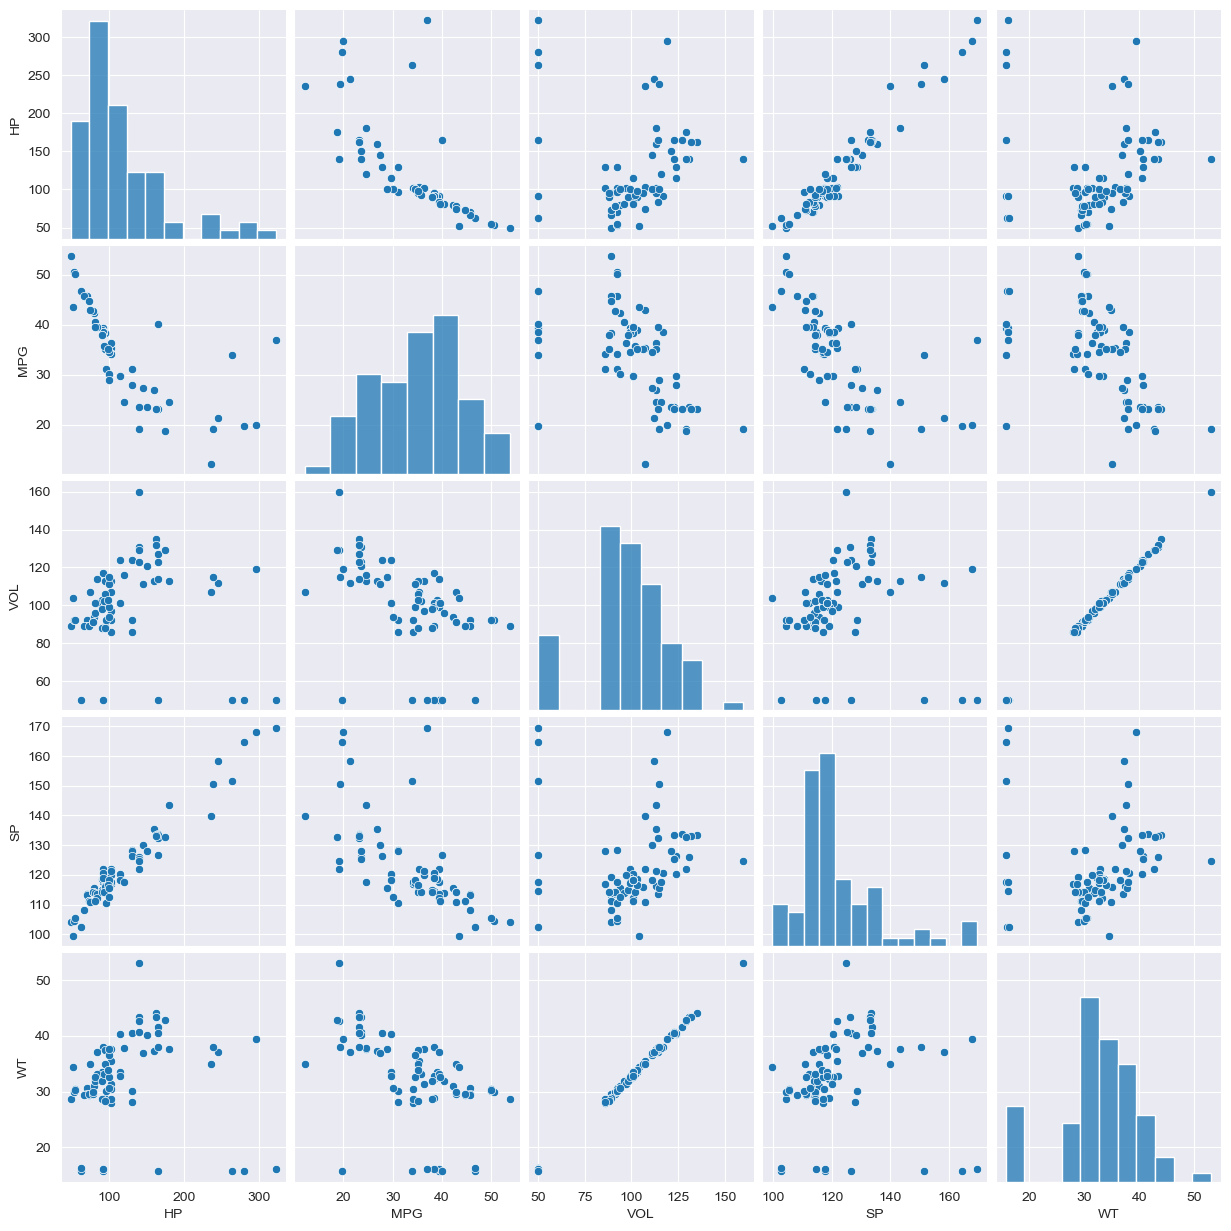

In [30]:
#pair plot
sns.set_style(style="darkgrid")
sns.pairplot(cars)

In [31]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


#### observations
- The highest correlation is observed blw wt and vol (0.999203)
- The second highest correlation is observed blw hp and sp (0.973848)
- The next highest correlation is obsrved blw Hp and Vol (0.077459)

#### Observations from correlation plots and coeffcients
- Between x and y, all the variables are showing moderate to high correlation strengths, highest being between HP and MPG
- Therefore this dataset qualifies for building a multiple linear regression model to predict MPG.
- Among X columns(x1,x2,x3 and x4), some very high correlation strengths are observed between SP vs HP, VOL vs WT
- The high correlation among x columns is not desirable as it might lead to multicollinearity problem

#### Preparing a preliminary model considering all x columns

In [35]:
#build model
#import statsmodels.formula.api as smf
model1=smf.ols("MPG~WT+VOL+SP+HP",data=cars).fit()

In [39]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        09:46:02   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R-square = The amount of variance in 'y' that is explained (captured) by x-columns.
- y_hat=bo+b1x1+b2x2+b3x3+b4x4......bnxn, 
  where betas are model params of coeficient.

#### Observations from model summary
- The R-squared and adjusted R_squared values are good and about 75% of variability in Y is explained by x columns.
- The probability value with respect t f-statistic is close to zero, indicating that all or some of x columns are significant.
- The p-values for VOL and WT are higher that 5% indicating some interaction issue among themselves, which need to be further explored.

- y_hat value=by using predict method on x data 
- resuidal = y-y_hat
- mean square error=sqauring every error

#### Performance metrics for model1

In [46]:
# find the metrices
#create a data frame with actual y and predicted y columns
df1=pd.DataFrame()
df1['actual_y1']=cars["MPG"]
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
